# Income Race 2019

In [3]:
# Dependencies
import requests
import pandas as pd
from census import Census
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2019
)

In [5]:
# Run Census Search to retrieve data on all states (2021 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E",
        "B19013A_001E",
        "B19013B_001E",
        "B19013C_001E",
        "B19013D_001E",
        "B19013E_001E",
        "B19013F_001E",
        "B19013G_001E",
        "B19013I_001E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
income_race_2019 = pd.DataFrame(census_data)

# Column renaming
income_race_2019 = income_race_2019.rename(
    columns = {
        "B19013_001E": "Household Income Total",
        "B19013A_001E": "White Alone Householder",
        "B19013B_001E": "African American Alone Householder",
        "B19013C_001E": "American Indian and Alaska Native Alone Householder",
        "B19013D_001E": "Asian Alone Householder",
        "B19013E_001E": "Native Hawaiian and Other Pacific Isalnder Alone Householder",
        "B19013F_001E": "Some Other Race Alone Householder",
        "B19013G_001E": "Two or more Races Householder",
        "B19013I_001E": "Hispanic or Latino Householder",
        "NAME": "Name"
    }
)


# Configure the final DataFrame
income_race_2019 = income_race_2019[
    [
        "Name",
        "Household Income Total",
        "White Alone Householder",
        "African American Alone Householder",
        "American Indian and Alaska Native Alone Householder",
        "Asian Alone Householder",
        "Native Hawaiian and Other Pacific Isalnder Alone Householder",
        "Some Other Race Alone Householder",
        "Two or more Races Householder",
        "Hispanic or Latino Householder"
    ]
]

# Rename name to state
income_race_2019 = income_race_2019.rename(columns={"Name":"State"})

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(income_race_2019)}")
income_race_2019

Number of rows in the DataFrame: 52


,State,Household Income Total,White Alone Householder,African American Alone Householder,American Indian and Alaska Native Alone Householder,Asian Alone Householder,Native Hawaiian and Other Pacific Isalnder Alone Householder,Some Other Race Alone Householder,Two or more Races Householder,Hispanic or Latino Householder
0,Alabama,50536.0,57551.0,33928.0,50114.0,63149.0,28377.0,36195.0,44274.0,41584.0
1,Alaska,77640.0,85298.0,62191.0,49959.0,73014.0,66994.0,66880.0,69752.0,69463.0
2,Arizona,58945.0,61172.0,47386.0,37974.0,78785.0,60905.0,46325.0,55685.0,48649.0
3,Arkansas,47597.0,51340.0,32070.0,40625.0,71716.0,46569.0,40276.0,38755.0,42532.0
4,California,75235.0,78308.0,51837.0,55362.0,96962.0,77788.0,55823.0,76116.0,58703.0
5,Colorado,72331.0,74730.0,51677.0,47097.0,80261.0,71173.0,51370.0,66582.0,53929.0
6,Delaware,68287.0,72508.0,50361.0,51891.0,96966.0,55990.0,57363.0,59340.0,55321.0
7,District of Columbia,86420.0,138231.0,45072.0,-666666666.0,106480.0,127917.0,60149.0,93455.0,81227.0
8,Connecticut,78444.0,85502.0,49000.0,43350.0,96689.0,37000.0,41569.0,58464.0,47753.0
9,Florida,55660.0,58809.0,41702.0,48608.0,72205.0,52632.0,46319.0,54597.0,49266.0


In [7]:
# Read in the housing listing prices to compare to income by race
listing_prices = pd.read_csv("output_data/Median Listing Prices.csv")
listing_prices

,Unnamed: 0,State,Year_Month_2019,Median Lising Price_2019,Year_Month_2020,Median Lising Price_2020,Year_Month_2021,Median Lising Price_2021
0,0,Pennsylvania,201912,219400.0,202012,259900.0,202112,250000.0
1,1,Utah,201912,412000.0,202012,531450.0,202112,588225.0
2,2,New York,201912,462450.0,202012,569000.0,202112,549945.0
3,3,Colorado,201912,473014.0,202012,510500.0,202112,549500.0
4,4,West Virginia,201912,161000.0,202012,165000.0,202112,175000.0
5,5,Florida,201912,329995.0,202012,342250.0,202112,414950.0
6,6,Wyoming,201912,266500.0,202012,265000.0,202112,325000.0
7,7,Minnesota,201912,279900.0,202012,299650.0,202112,320000.0
8,8,Kansas,201912,179950.0,202012,195125.0,202112,212500.0
9,9,Virginia,201912,316225.0,202012,344995.0,202112,366975.0


In [8]:
income_race = pd.merge(income_race_2019, listing_prices, on=('State'), how='right')

income_race = income_race[["State",
                         "Year_Month_2019",
                         "Median Lising Price_2019",
                         "Household Income Total",
                         "White Alone Householder",
                         "African American Alone Householder",
                         "American Indian and Alaska Native Alone Householder",
                         "Asian Alone Householder",
                         "Native Hawaiian and Other Pacific Isalnder Alone Householder",
                         "Some Other Race Alone Householder",
                         "Two or more Races Householder",
                         "Hispanic or Latino Householder"
                        ]]

income_race["Median Lising Price_2019"] = income_race["Median Lising Price_2019"].map("${:,.2f}".format)
income_race["Household Income Total"] = income_race["Household Income Total"].map("${:,.2f}".format)
income_race["White Alone Householder"] = income_race["White Alone Householder"].map("${:,.2f}".format)
income_race["African American Alone Householder"] = income_race["African American Alone Householder"].map("${:,.2f}".format)
income_race["American Indian and Alaska Native Alone Householder"] = income_race["American Indian and Alaska Native Alone Householder"].map("${:,.2f}".format)
income_race["Asian Alone Householder"] = income_race["Asian Alone Householder"].map("${:,.2f}".format)
income_race["Native Hawaiian and Other Pacific Isalnder Alone Householder"] = income_race["Native Hawaiian and Other Pacific Isalnder Alone Householder"].map("${:,.2f}".format)
income_race["Some Other Race Alone Householder"] = income_race["Some Other Race Alone Householder"].map("${:,.2f}".format)
income_race["Two or more Races Householder"] = income_race["Two or more Races Householder"].map("${:,.2f}".format)
income_race["Hispanic or Latino Householder"] = income_race["Hispanic or Latino Householder"].map("${:,.2f}".format)

income_race

,State,Year_Month_2019,Median Lising Price_2019,Household Income Total,White Alone Householder,African American Alone Householder,American Indian and Alaska Native Alone Householder,Asian Alone Householder,Native Hawaiian and Other Pacific Isalnder Alone Householder,Some Other Race Alone Householder,Two or more Races Householder,Hispanic or Latino Householder
0,Pennsylvania,201912,"$219,400.00","$61,744.00","$65,306.00","$38,560.00","$40,622.00","$76,682.00","$47,237.00","$36,566.00","$48,713.00","$41,725.00"
1,Utah,201912,"$412,000.00","$71,621.00","$73,580.00","$41,752.00","$45,957.00","$73,139.00","$66,391.00","$51,365.00","$61,957.00","$53,547.00"
2,New York,201912,"$462,450.00","$68,486.00","$76,737.00","$48,557.00","$41,509.00","$76,341.00","$54,593.00","$42,907.00","$60,767.00","$49,159.00"
3,Colorado,201912,"$473,014.00","$72,331.00","$74,730.00","$51,677.00","$47,097.00","$80,261.00","$71,173.00","$51,370.00","$66,582.00","$53,929.00"
4,West Virginia,201912,"$161,000.00","$46,711.00","$47,143.00","$33,133.00","$30,406.00","$64,567.00","$-666,666,666.00","$43,554.00","$43,148.00","$48,729.00"
5,Florida,201912,"$329,995.00","$55,660.00","$58,809.00","$41,702.00","$48,608.00","$72,205.00","$52,632.00","$46,319.00","$54,597.00","$49,266.00"
6,Wyoming,201912,"$266,500.00","$64,049.00","$64,820.00","$47,386.00","$51,277.00","$54,516.00","$-666,666,666.00","$48,640.00","$54,405.00","$52,717.00"
7,Minnesota,201912,"$279,900.00","$71,306.00","$74,387.00","$37,811.00","$37,973.00","$79,482.00","$49,330.00","$49,138.00","$57,670.00","$51,426.00"
8,Kansas,201912,"$179,950.00","$59,597.00","$61,812.00","$38,079.00","$41,691.00","$70,987.00","$60,323.00","$46,581.00","$48,392.00","$47,203.00"
9,Virginia,201912,"$316,225.00","$74,222.00","$79,578.00","$51,654.00","$62,186.00","$105,931.00","$78,021.00","$59,123.00","$73,026.00","$68,772.00"


In [9]:
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_housing = income_race[income_race["State"].isin(selected_states)]
selected_housing

,State,Year_Month_2019,Median Lising Price_2019,Household Income Total,White Alone Householder,African American Alone Householder,American Indian and Alaska Native Alone Householder,Asian Alone Householder,Native Hawaiian and Other Pacific Isalnder Alone Householder,Some Other Race Alone Householder,Two or more Races Householder,Hispanic or Latino Householder
2,New York,201912,"$462,450.00","$68,486.00","$76,737.00","$48,557.00","$41,509.00","$76,341.00","$54,593.00","$42,907.00","$60,767.00","$49,159.00"
5,Florida,201912,"$329,995.00","$55,660.00","$58,809.00","$41,702.00","$48,608.00","$72,205.00","$52,632.00","$46,319.00","$54,597.00","$49,266.00"
12,California,201912,"$551,728.00","$75,235.00","$78,308.00","$51,837.00","$55,362.00","$96,962.00","$77,788.00","$55,823.00","$76,116.00","$58,703.00"
20,Illinois,201912,"$231,450.00","$65,886.00","$71,922.00","$38,573.00","$49,634.00","$90,278.00","$46,023.00","$52,832.00","$59,451.00","$55,836.00"
34,Texas,201912,"$285,000.00","$61,874.00","$64,810.00","$46,572.00","$56,394.00","$88,486.00","$55,136.00","$45,681.00","$60,327.00","$49,260.00"


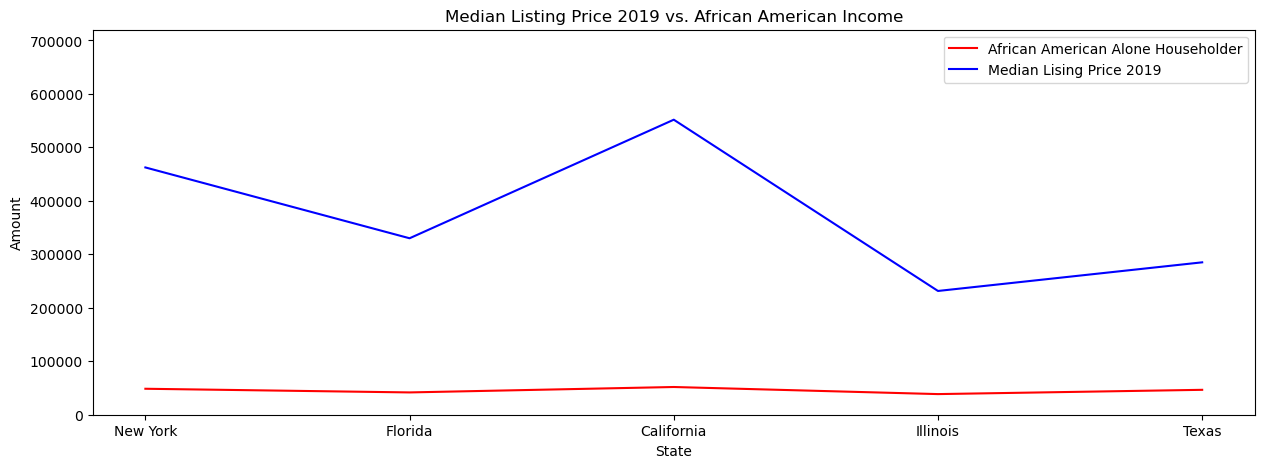

In [23]:
# Plot the difference between house listings and income by race
x_value = selected_housing['State']
selected_housing["Median Lising Price_2019"] = selected_housing["Median Lising Price_2019"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Lising Price_2019']
x_value2 = selected_housing['State']
selected_housing["African American Alone Householder"] = selected_housing["African American Alone Householder"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['African American Alone Householder']
plt.plot(x_value2,y_value2, color="red", label="African American Alone Householder")
plt.plot(x_value,y_value, color="blue", label="Median Lising Price 2019")
plt.xlabel("State")
plt.ylabel("Amount")
plt.title("Median Listing Price 2019 vs. African American Income")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig6.png")
plt.show()

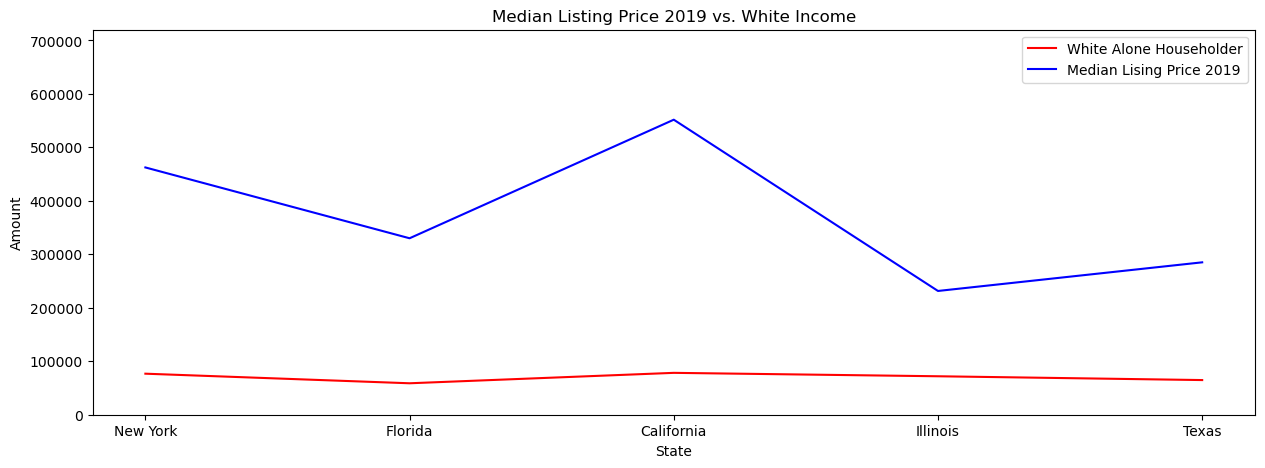

In [24]:
# Plot the difference between house listings and income by race
x_value = selected_housing['State']
selected_housing["Median Lising Price_2019"] = selected_housing["Median Lising Price_2019"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Lising Price_2019']
x_value2 = selected_housing['State']
selected_housing["White Alone Householder"] = selected_housing["White Alone Householder"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['White Alone Householder']
plt.plot(x_value2,y_value2, color="red", label="White Alone Householder")
plt.plot(x_value,y_value, color="blue", label="Median Lising Price 2019")
plt.title("Median Listing Price 2019 vs. White Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig6.png")
plt.show()

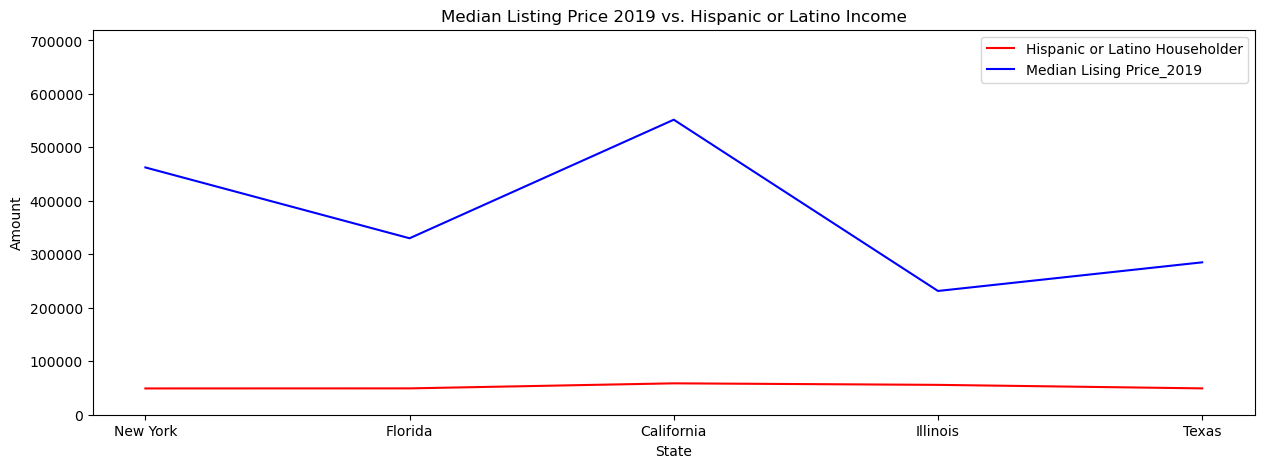

In [25]:
# Plot the difference between house listings and income by race
x_value = selected_housing['State']
selected_housing["Median Lising Price_2019"] = selected_housing["Median Lising Price_2019"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Lising Price_2019']
x_value2 = selected_housing['State']
selected_housing["Hispanic or Latino Householder"] = selected_housing["Hispanic or Latino Householder"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Hispanic or Latino Householder']
plt.plot(x_value2,y_value2, color="red", label="Hispanic or Latino Householder")
plt.plot(x_value,y_value, color="blue", label="Median Lising Price_2019")
plt.title("Median Listing Price 2019 vs. Hispanic or Latino Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig9.png")
plt.show()